### pangaeapy

This module allows to download and analyse metadata as well as data from tabular PANGAEA (https://www.pangaea.de) datasets.

https://github.com/pangaea-data-publisher/pangaeapy

In [8]:
import pangaeapy.src.pandataset as pandataset

In [9]:
# You want data from https://doi.pangaea.de/10.1594/PANGAEA.912222

ds= pandataset.PanDataSet(912222)
print(ds.title)
print(ds.year)
for a in ds.authors: 
    print(a.fullname)

Seawater carbonate chemistry and coral calcification
2020
Gómez Batista, Miguel
Metian, Marc
Oberhänsli, F
Pouil, Simon
Tambutté, Eric
Gattuso, Jean-Pierre
Hernández, Carlos M Alonso
Gazeau, Frédéric


/home/brock/.local/lib/python3.8/site-packages/pangaeapy/src/pandataset.py:407: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  self.setData(addQC=addQC)


In [10]:
ds.data.head()

,Type,Species,Reg spec no,URL ref,Exp,Type_2,Type_3,Treat,ID,Date/time start,...,[HCO3]-_2,[HCO3]- std dev_2,[CO3]2-_2,[CO3]2- std dev_2,DIC_2,DIC std dev_2,Omega Arg_2,Omega Arg std dev_2,Omega Cal_2,Omega Cal std dev_2
0,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,1,2017-08-23T08:15,...,1634.05,14.59,224.22,6.81,1868.31,8.30,3.36,0.19,5.08,0.28
1,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,2,2017-08-23T08:15,...,1613.23,14.42,221.79,6.74,1844.93,8.19,3.32,0.18,5.02,0.28
2,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,3,2017-08-23T08:15,...,1587.60,15.49,244.90,7.24,1841.19,8.76,3.66,0.20,5.54,0.30
3,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,4,2017-08-23T08:15,...,1647.49,13.91,210.56,6.50,1868.91,7.90,3.16,0.18,4.77,0.26
4,laboratory,Stylophora pistillata (coral),206982,http://www.marinespecies.org/aphia.php?p=taxde...,IC-LIGHT-45Ca,Exp,45Ca,Ambient pH / Light,5,2017-08-23T08:15,...,1584.54,14.16,217.42,6.60,1811.70,8.05,3.26,0.18,4.92,0.27


In [11]:
ds.data.columns

Index(['Type', 'Species', 'Reg spec no', 'URL ref', 'Exp', 'Type_2', 'Type_3',
       'Treat', 'ID', 'Date/time start', 'Date/time end', 'Inc dur', 'Size',
       'Mass', 'Mass_2', 'Dry m', 'Mass_3', 'Mass_4', 'Mass_5', 'Mass_6',
       'Sal', 'Sal_2', 'pH', 'pH_2', 'AT', 'AT std dev', 'AT_2',
       'AT std dev_2', 'Ca2+', 'Ca2+ std dev', 'Ca2+_2', 'Ca2+ std dev_2',
       '45Ca', '45Ca_2', '45Ca_3', '45Ca std dev', 'δ13C', 'δ13C_2',
       'δ13C std dev', 'δ13C_3', 'δ13C_4', 'Calc rate CaCO3',
       'Calc rate std e', 'Calc rate CaCO3_2', 'Calc rate std e_2',
       'Calc rate CaCO3_3', 'Calc rate std e_3', 'Calc rate CaCO3_4',
       'Calc rate std e_4', 'Temp', 'Temp std dev', 'CSC flag', 'CO2',
       'CO2 std dev', 'fCO2water_SST_wet', 'fCO2 std dev', 'pCO2water_SST_wet',
       'pCO2 std dev', '[HCO3]-', '[HCO3]- std dev', '[CO3]2-',
       '[CO3]2- std dev', 'DIC', 'DIC std dev', 'Omega Arg',
       'Omega Arg std dev', 'Omega Cal', 'Omega Cal std dev', 'CO2_2',
       'CO2 st

<AxesSubplot:xlabel='Date/time start'>

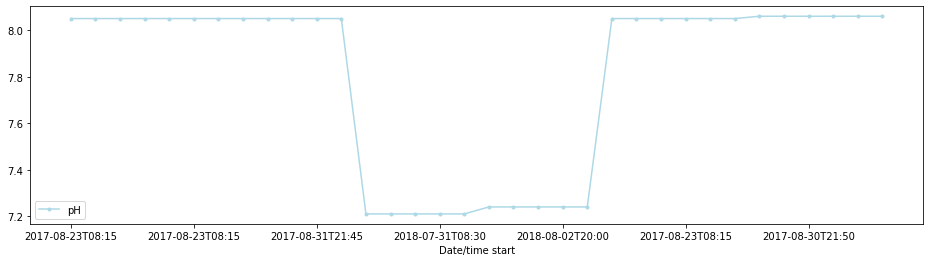

In [12]:
ds.data.plot(x='Date/time start', y='pH', c='lightblue', marker='.', figsize=[16,4])

In [13]:
ds.data['CSC flag'].unique()

array([8])

In [14]:
import json
import urllib
import pandas as pd

In [15]:
# Extract all articles (citation_date and keyword included)

url = 'http://ws.pangaea.de/es/dataportal-oa-icc/pansimple/_search?size=2000&_source_include=citation_date,keyword'

jsonurl = urllib.request.urlopen(url)
jsonread = json.loads(jsonurl.read())
jsonurl.close()

In [16]:
# Transform the resulting json to a pandas dataframe

df = pd.DataFrame.from_dict(jsonread['hits']['hits'])
df

,_index,_type,_id,_score,_source
0,portals_v2,pansimple,PANGAEA.884674,1.0,"{'citation_date': '2018-01-09', 'keyword': ['A..."
1,portals_v2,pansimple,PANGAEA.771570,1.0,"{'citation_date': '2011-11-18', 'keyword': ['A..."
2,portals_v2,pansimple,PANGAEA.779703,1.0,"{'citation_date': '2011-04-21', 'keyword': ['B..."
3,portals_v2,pansimple,PANGAEA.891075,1.0,"{'citation_date': '2018-06-15', 'keyword': ['A..."
4,portals_v2,pansimple,PANGAEA.885874,1.0,"{'citation_date': '2018-02-02', 'keyword': ['B..."
...,...,...,...,...,...
1318,portals_v2,pansimple,PANGAEA.726955,1.0,"{'citation_date': '2008-08-31', 'keyword': ['B..."
1319,portals_v2,pansimple,PANGAEA.888813,1.0,"{'citation_date': '2017-04-23', 'keyword': ['B..."
1320,portals_v2,pansimple,PANGAEA.835475,1.0,"{'citation_date': '2011-09-03', 'keyword': ['A..."
1321,portals_v2,pansimple,PANGAEA.931402,1.0,"{'citation_date': '2021-05-12', 'keyword': ['B..."


In [17]:
# Reorganize _source dictionnary as columns

# Sometimes only {} and not {'keyword: [...]'}
df['citation_date'] = df['_source'].apply(
    lambda x: eval(str(x))['citation_date'] if 'citation_date' in eval(str(x)).keys() else None)
df['keyword'] = df['_source'].apply(
    lambda x: eval(str(x))['keyword'] if 'keyword' in eval(str(x)).keys() else None)

In [18]:
# Drop unused columns

df.drop(['_score','_type','_index','_source'], axis=1, inplace=True)
df.sort_values(by=['citation_date'])

,_id,citation_date,keyword
360,PANGAEA.755149,1967-12-13,"[Calcification/Dissolution, Coast and continen..."
654,PANGAEA.717620,1992-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
652,PANGAEA.717621,1994-06-05,"[Benthos, Calcification/Dissolution, Coast and..."
1038,PANGAEA.721926,1995-03-01,"[Benthos, Calcification/Dissolution, Coast and..."
27,PANGAEA.716842,1995-05-30,"[Benthos, Calcification/Dissolution, Coast and..."
...,...,...,...
602,PANGAEA.936683,2021-10-05,"[Animalia, Antarctic, Benthic animals, Benthos..."
1308,PANGAEA.937216,2021-10-12,"[Benthos, Calcification/Dissolution, Coast and..."
1285,PANGAEA.937391,2021-10-15,"[Animalia, Benthic animals, Benthos, Bottles o..."
1314,PANGAEA.937477,2021-10-20,"[Animalia, Benthic animals, Benthos, Calcifica..."


In [47]:
%%capture

d1 = pd.DataFrame()
#for DOI in df['_id'][10:19]:
for DOI in df['_id']:
    Pangaea_DOI = int(DOI.split('.')[1])
    try:
        ds = pandataset.PanDataSet(Pangaea_DOI)
        CSC_flag = ds.data['CSC flag'].unique()
    except:
        CSC_flag = None
    d1 = d1.append({'Pangaea_DOI': DOI, 'CSC flag': CSC_flag}, ignore_index=True)

In [53]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(d1.dropna())

         Pangaea_DOI               CSC flag
16    PANGAEA.888942                   [29]
17    PANGAEA.929633                    [8]
18    PANGAEA.926403                    [8]
19    PANGAEA.830185                    [8]
20    PANGAEA.823376                    [8]
21    PANGAEA.925816                    [8]
22    PANGAEA.849341                   [15]
23    PANGAEA.923104                    [9]
24    PANGAEA.879615            [15.0, nan]
25    PANGAEA.831619            [15.0, nan]
26    PANGAEA.830736                    [8]
28    PANGAEA.864475                    [8]
29    PANGAEA.892313                    [8]
30    PANGAEA.907776                    [8]
31    PANGAEA.757990                   [26]
32    PANGAEA.869415  [15.0, 8.0, 9.0, nan]
33    PANGAEA.868942                   [15]
34    PANGAEA.919851                    [8]
35    PANGAEA.835430                   [24]
36    PANGAEA.875707                   [15]
37    PANGAEA.908180                   [15]
38    PANGAEA.834082      [28.0,

In [58]:
ds = pandataset.PanDataSet(778448)
ds.data['CSC flag'].unique()
print(ds.data['CSC flag'].to_markdown())

|     |   CSC flag |
|----:|-----------:|
|   0 |         29 |
|   1 |         29 |
|   2 |         29 |
|   3 |         29 |
|   4 |         29 |
|   5 |         29 |
|   6 |         29 |
|   7 |         29 |
|   8 |         29 |
|   9 |         29 |
|  10 |         29 |
|  11 |         29 |
|  12 |         29 |
|  13 |         29 |
|  14 |         29 |
|  15 |         29 |
|  16 |         29 |
|  17 |         29 |
|  18 |         29 |
|  19 |         29 |
|  20 |         29 |
|  21 |         29 |
|  22 |         29 |
|  23 |         29 |
|  24 |         29 |
|  25 |         29 |
|  26 |         29 |
|  27 |         29 |
|  28 |         29 |
|  29 |         29 |
|  30 |         29 |
|  31 |         29 |
|  32 |         29 |
|  33 |         29 |
|  34 |         29 |
|  35 |         29 |
|  36 |         29 |
|  37 |         29 |
|  38 |         29 |
|  39 |         29 |
|  40 |         29 |
|  41 |         29 |
|  42 |         29 |
|  43 |         29 |
|  44 |         29 |
|  45 |      